# Leer la tabla

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
from itertools import product
from datetime import datetime
plt.style.use('seaborn-poster')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
real = pd.read_csv('C:/Users/vantunez/Desktop/Forecast.csv')
detalle = pd.read_csv('C:/Users/vantunez/Desktop/Detalle.csv')
real.sample(5)

,Date,Poliza,Prima,Cantidad
655,1/9/2017,400020,8084.75,272
4111,1/11/2018,100386,84.80,3
2221,1/4/2018,100264,249240.98,2
3885,1/10/2018,200091,63920.69,542
339,1/8/2017,100262,84174.78,3


In [3]:
detalle.sample(5)

,Poliza,Prod,Grupo Economico,Canal de Venta,Vinculo Comercial,Equipo Comercial
391,200049,AP,IPLYC,PRODUCTOR,PRODUCTOR,H.Reich
103,100153,VC,Grupo Pampa,FUERZA DE VENTA,DIRECTO,M.Albano
548,300003,SEP,Marandu,FUERZA DE VENTA,DIRECTO,H.Reich
325,100392,VC,ABSeguros,ECOMMERCE,PRODUCTOR,A.Cortez
254,100321,SD,MERCEDES BENZ,BANCA SEGUROS,AI&P,H.Reich


In [4]:
real['Date'] = pd.to_datetime(real['Date'], format='%d/%m/%Y')

In [5]:
real.dtypes

Date        datetime64[ns]
Poliza               int64
Prima              float64
Cantidad             int64
dtype: object

In [6]:
detalle.dtypes

Poliza                int64
Prod                 object
Grupo Economico      object
Canal de Venta       object
Vinculo Comercial    object
Equipo Comercial     object
dtype: object

In [7]:
real.Poliza.count()

5537

In [8]:
real.Prima.sum()

1164724654.8199997

In [9]:
real.Cantidad.sum()

1494724

In [10]:
real.sample(5)

,Date,Poliza,Prima,Cantidad
1502,2018-01-01,100206,21539.64,1
3782,2018-10-01,100213,0.00,1
598,2017-09-01,100295,0.00,2
2224,2018-04-01,100267,589.26,1
1551,2018-01-01,100277,5532.00,75


# Merge all

In [11]:
base = pd.merge(real, detalle, on = ['Poliza'], how= 'inner')
base.sample(5)

,Date,Poliza,Prima,Cantidad,Prod,Grupo Economico,Canal de Venta,Vinculo Comercial,Equipo Comercial
3285,2018-04-01,200016,5589.14,91,AP,Call Center,ECOMMERCE,DIRECTO,A.Cortez
2936,2018-07-01,100264,292907.13,3,VC,EDENOR,INSTITUCIONAL,PRODUCTOR,H.Reich
1177,2018-04-01,100134,286.60,1,SD,Banco Nación,BANCA SEGUROS,AGENTE INSTITORIO,M.Albano
4187,2017-12-01,100294,121413.60,594,VC,ABSeguros,ECOMMERCE,PRODUCTOR,A.Cortez
1857,2018-04-01,100188,2206.68,41,VC,BST,TELEMARKETING,AI&P,A.Cortez


In [12]:
base.Poliza.count()

5537

In [13]:
base.Prima.sum()

1164724654.819999

In [14]:
base.dtypes

Date                 datetime64[ns]
Poliza                        int64
Prima                       float64
Cantidad                      int64
Prod                         object
Grupo Economico              object
Canal de Venta               object
Vinculo Comercial            object
Equipo Comercial             object
dtype: object

fig = plt.figure(figsize=[15, 7])
plt.plot(base.Date, base.Prima)
plt.show()

In [15]:
base.describe()

,Poliza,Prima,Cantidad
count,5.537000e+03,5.537000e+03,5537.000000
mean,3.054295e+06,2.103530e+05,269.951960
std,1.764670e+07,8.456817e+05,1835.817235
min,1.000230e+05,-8.531737e+05,1.000000
25%,1.001510e+05,6.237400e+02,1.000000
50%,1.002530e+05,4.848980e+03,2.000000
75%,1.003960e+05,3.694559e+04,9.000000
max,1.170000e+08,1.123953e+07,33532.000000


In [16]:
tab_info = pd.DataFrame(base.dtypes).T.rename(index={0:'column Type'}) 
tab_info = tab_info.append(pd.DataFrame(base.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(base.isnull().sum()/base.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'}))
tab_info

,Date,Poliza,Prima,Cantidad,Prod,Grupo Economico,Canal de Venta,Vinculo Comercial,Equipo Comercial
column Type,datetime64[ns],int64,float64,int64,object,object,object,object,object
null values (nb),0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0


# Gráficos

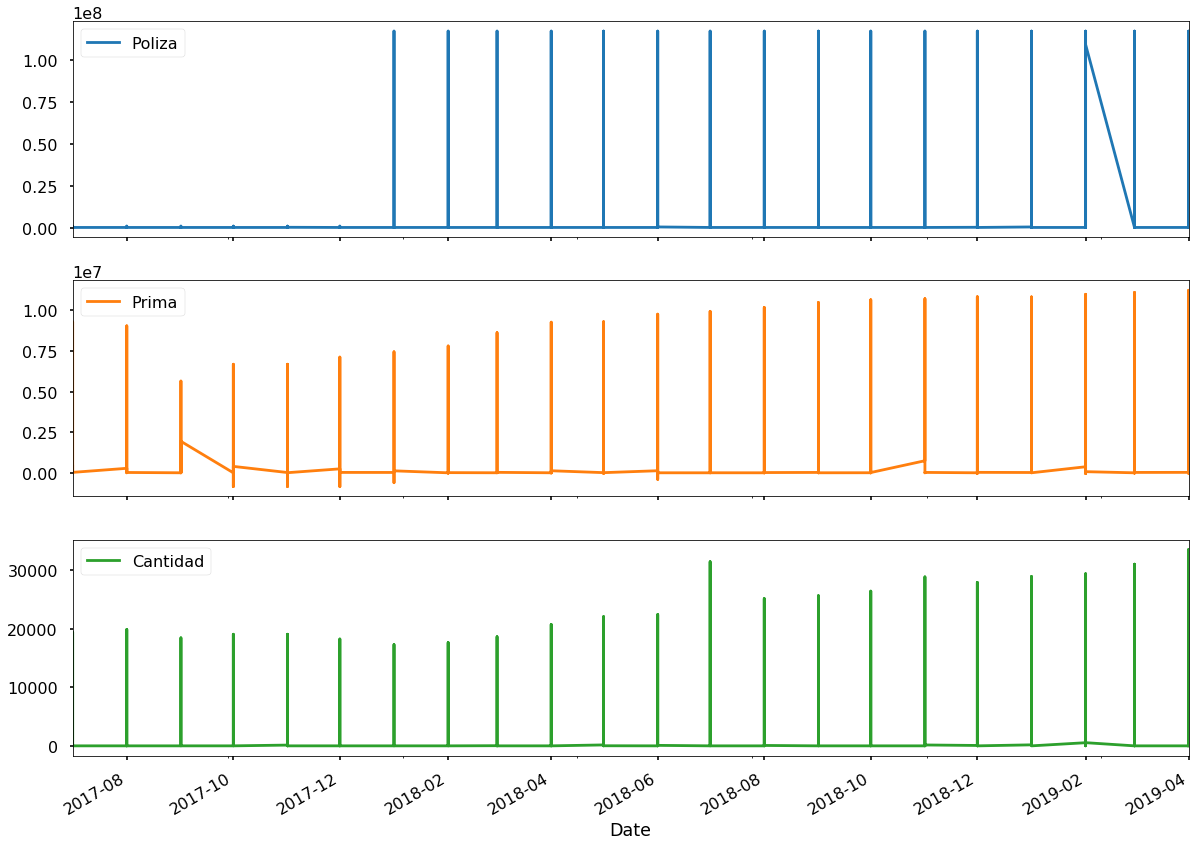

In [17]:
base.plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

# Forecast

In [19]:
base_sort = base.sort_values('Date', ascending=False)

In [37]:
base['Prima'], lmbda = stats.boxcox(base.Prima)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(base.Prima)[1])

NameError: name 'stats' is not defined

### Parametros

Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

### Selección de modelos

In [32]:
import warnings
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(base.Prima, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (0, 0, 0, 0)
wrong parameters: (0, 0, 0, 1)
wrong parameters: (0, 0, 1, 0)
wrong parameters: (0, 0, 1, 1)
wrong parameters: (0, 0, 2, 0)
wrong parameters: (0, 0, 2, 1)
wrong parameters: (0, 1, 0, 0)
wrong parameters: (0, 1, 0, 1)
wrong parameters: (0, 1, 1, 0)
wrong parameters: (0, 1, 1, 1)
wrong parameters: (0, 1, 2, 0)
wrong parameters: (0, 1, 2, 1)
wrong parameters: (0, 2, 0, 0)
wrong parameters: (0, 2, 0, 1)
wrong parameters: (0, 2, 1, 0)
wrong parameters: (0, 2, 1, 1)
wrong parameters: (0, 2, 2, 0)
wrong parameters: (0, 2, 2, 1)
wrong parameters: (1, 0, 0, 0)
wrong parameters: (1, 0, 0, 1)
wrong parameters: (1, 0, 1, 0)
wrong parameters: (1, 0, 1, 1)
wrong parameters: (1, 0, 2, 0)
wrong parameters: (1, 0, 2, 1)
wrong parameters: (1, 1, 0, 0)
wrong parameters: (1, 1, 0, 1)
wrong parameters: (1, 1, 1, 0)
wrong parameters: (1, 1, 1, 1)
wrong parameters: (1, 1, 2, 0)
wrong parameters: (1, 1, 2, 1)
wrong parameters: (1, 2, 0, 0)
wrong parameters: (1, 2, 0, 1)
wrong pa

### Mejor modelo

In [36]:
result_table = pd.DataFrame(results)
results

[]

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

In [27]:
base_prima = base[['Prima']]
date_list = [datetime(2019, 5, 1), datetime(2019, 6, 1), datetime(2019, 7, 1), datetime(2019, 8, 1), 
             datetime(2019, 9, 1), datetime(2019, 10, 1), datetime(2019, 11, 1), datetime(2019, 12, 1),
             datetime(2020, 1, 1)]
future = pd.DataFrame(index=date_list, columns= base.columns)

In [28]:
base_prima = pd.concat([base_prima, future])
base_prima['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)

NameError: name 'best_model' is not defined

In [ ]:
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

In [18]:


def fit_ar_model(ts, orders):
    
    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    
    mask = ~np.isnan(X[:,:1]).squeeze()
    
    Y= ts.values
    
    lin_reg=LinearRegression()
    
    lin_reg.fit(X[mask],Y[mask])
    
    print(lin_reg.coef_, lin_reg.intercept_)

    print('Score factor: %.2f' % lin_reg.score(X[mask],Y[mask]))
    
    return lin_reg.coef_, lin_reg.intercept_
    
def predict_ar_model(ts, orders, coef, intercept):
    return np.array([np.sum(np.dot(coef, ts.values[(i-orders)].squeeze())) + intercept  if i >= np.max(orders) else np.nan for i in range(len(ts))])